# How does publication number and topic affect a Universities Ranking in Top 20 CS Schools?
### Authors: Mitchell Skopic and Kalyan Kanagala
## Table of Contents
1. Introduction to the Problem
2. Data Collection
3. Exploratory Data Analysis
4. Hypothesis Testing
5. Conclusion

## 1. Introduction to the Problem
### Imagine...
You're a bright, ambitious high school senior preparing to enter college. For years you've had a fascination with computers and the exciting research surrounding them. In short, you want to study and contribute to the field of computer science. But where should you study? Which Universities have research you're interested in? Does research influence the computer science education? What should you do?
### The Problem
There are numerous resources to determine top computer science programs, one of the most famous being U.S. News and World Report's. What factors does U.S. News and World Report use when determining rankings? How is research factored into that? And that is what we aim to find out.<br><br>
**How does research quantity and topic influence the rankings of computer science school?**<br><br>
This problem is important for several reasons. One, choosing a university is an extremely important decision, one which requires as much information as possible. Two, one gets out of university what they put in. In other words, if a student seeks an academic track, they would prefer a university with an emphasis on research and publication. If they seek a professional track, these metrics matter less. And three, knowing a schools area of research (and how prevalent their research is in the field) is important when making a decision. A systems research oriented student would not be university searching with the same criteria as a data science oriented student looking to work in industry.
### Overview
To answer these questions and help students make more informed university decisions, we will be analyzing data from csrankings.com in terms of their rankings as well as their data on computer science research from the past ten years. There have been previous analyses on faculty number and rankings (https://krixly.github.io/) however this projects seeks to find correlations between research quantity and area on rankings.
#### Ulterior Motives?
This analysis also doubles as a tutorial in data science, particularly the data science pipeline. Data science seeks to analyze data to extract meaning. In our case, this meaning comes in the form of understanding how research affects CS rankings. The pipeline we use includes: Data collection and organization, exploratory data analysis, hypothesis testing and machine learning, and finally interpretation and meaning explanation. To aid in this understanding, we have included extra resources in the form of links and definitions.<br>For more information on data science in general, visit: https://en.wikipedia.org/wiki/Data_science<br>For more information on the data science pipeline, visit: https://towardsdatascience.com/a-beginners-guide-to-the-data-science-pipeline-a4904b2d8ad3

## 2. Data Collection and Organization
#### General Data Collection and Organization Info
The first step in the data science pipeline is data collection and organization. There are many ways to collect data that range from running your own scientific experiments, polling a sample, to scraping data from a web servie. Data scraping means using code to extract data from another program. A common practice in python data science is to read the data into a dataframe, which is a table structure which makes data manipulation and analysis easy. Once the data is in a dataframe certain issues arise such as missing or duplicated data. To combat this, we cleanse the data to ensure it has only valid values and won't be skewed by duplications. Finally, the last step of this section is data organization which is when you drop unwanted data and tidy the data. Tidy data is when each row represents a single observation (in our case, each row will be a university).<br>More info on tidy data(pdf download): https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf
#### Our Data Collection and Organization
We scraped data from csrankings.org (see link below). This data contains the raw data used to create this sources Top 20 CS schools rankings. It includes information on professors, their publications, their associated universities, and the area of research. An important aspect of data scraping is its human readability. A csv file (Def: CSV- comma separated values) organizes rows of a data table by separating each data entry with a comma. We read our data into a dataframe.
<br>Follow the steps below to see how we scraped, cleansed, and tidied our data.
<br><br>Data came from: https://raw.githubusercontent.com/emeryberger/CSrankings/gh-pages/csrankings.csv

In [232]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
%matplotlib inline

For the top 20 rankings data, we created a csv file from csrankings.org. Then we dropped two columns (group and faculty) because they would not be useful for us.

In [233]:
#read the top 20 rankings from csrankings.org (data was copied from the website to a csv)
top_20_universities_rank = pd.read_csv("top_20_cs_schools.csv")

#remove unnecesary columns
top_20_universities_rank.drop('group',axis = 1,inplace = True)
top_20_universities_rank.drop('faculty',axis = 1,inplace = True)

#get the list of top 20 schools
top_20 = list(top_20_universities_rank['University'])
rank = list(top_20_universities_rank['Rank'])

top_20_universities_rank

,Rank,University
0,1,Carnegie Mellon University
1,2,Massachusetts Institute of Technology
2,3,Stanford University
3,4,University of California - Berkeley
4,5,Univ. of Illinois at Urbana-Champaign
5,6,University of Michigan
6,7,Cornell University
7,8,University of Washington
8,9,Georgia Institute of Technology
9,10,University of California - San Diego


Next, we read data from https://raw.githubusercontent.com/emeryberger/CSrankings/gh-pages/generated-author-info.csv . This process used a python function, read_csv() to scraped the data directly from a webpage. Here is the first time we are doing cleansing. <br>The potential problem: This data could contain entries we don't need or could have invalid entries (for example, if an entry does not contain a value for publication area). <br>Solution: cleanse the data to ensure the data we're using will give us the most relevant and valid results. The first cleansing step is to drop columns that we do not need (such as professor name). We also rename columns (dept to university) to better understand what the data means in the context of our analysis.

In [236]:
#read data from csv file into a pandas dataframe
professor_publication_info_csv = "https://raw.githubusercontent.com/emeryberger/CSrankings/gh-pages/generated-author-info.csv"
professor_publication_info = pd.read_csv(professor_publication_info_csv)

#drop the professor's name from the table as we don't need this information
professor_publication_info.drop('name',axis = 1,inplace = True)

#drop the count and adjustedcount fields. They are not relevant to our analysis
professor_publication_info.drop('count',axis = 1,inplace = True)
professor_publication_info.drop('adjustedcount',axis = 1,inplace = True)

#rename the column label from 'dept' to 'university' because it better represents how we understand the data
professor_publication_info.rename(columns={"dept":"university"}, inplace=True)

#rename the column label from 'area' to 'research area' because it better represents how we understand the data
professor_publication_info.rename(columns={"area":"research area"}, inplace=True)

professor_publication_info.head()

,university,research area,year
0,Imperial College London,icra,2016
1,Istanbul Technical University,acl,2007
2,VU Amsterdam,ijcai,2007
3,Bilkent University,ismb,2014
4,George Mason University,fse,2016


The next step of cleansing the data set is to remove all entries that aren't ranked in the top 20 universities. We show the significance of this step by printing the total number of entries and then the number of remaining entries after we cleanse the unwanted entries. All of that unwanted data would invalidate any data analysis.

In [237]:
print(f'Number of total entries before cleansing by year: {len(professor_publication_info)}')

valid_years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

#first step is to drop all the entries with data older than 2008
professor_publication_info = professor_publication_info[professor_publication_info['year'].isin(valid_years)]

print(f'Number of total entries after cleansing by year: {len(professor_publication_info)}')

Number of total entries before cleansing by year: 101597
Number of total entries after cleansing by year: 61801


In [238]:
#this section of cleansing will remove any data from a university not in the top 20
print(f'Number of total entries after cleansing by uni: {len(professor_publication_info)}')

#dropping anything not related to top 20 universities
professor_publication_info = professor_publication_info[professor_publication_info['university'].isin(top_20)]

print(f'Number of total entries after cleansing by uni: {len(professor_publication_info)}')

Number of total entries after cleansing by uni: 61801
Number of total entries after cleansing by uni: 17593


As we can see, the cleansing was an extremely important to reducing the number of data entries from 101597 to 17593. Now we're left with data relating only to publications at the top 20 universities from the past 10 years (2008-2018)<br><br>The next step is to ensure there is no missing data. We do this by checking the unique values of each column. If there is something unexpected, such as a 'research area' entry which is not one validated on csrankings.com, we should remove that entry. We accomplish this by looking at the output of unique entries and looking for anything invalid.

In [239]:
professor_publication_info['research area'].unique()
#by checking which research areas are used to calculate ranking, we found that:
#pets is not tracked
#chiconf not tracked

print(f'Number of total entries before cleansing untracked research areas: {len(professor_publication_info)}')
publications_including_untracked = professor_publication_info.copy(deep=True)
untracked = ['pets', 'chiconf']
untracked_publications = untracked_publications[untracked_publications['research area'].isin(untracked)]

#remove untracked research areas from data
professor_publication_info = professor_publication_info[~professor_publication_info['research area'].isin(untracked)]
print(f'Number of total entries after cleansing untracked research areas: {len(professor_publication_info)}')

Number of total entries before cleansing untracked research areas: 17593
Number of total entries after cleansing untracked research areas: 16826


When looking for invalid data, we found two areas of research which were not part of the set of areas which were considered in the rankings. So, we removed those entries from the main publication data table. Prior to this, we copied the dataframe so we have a version with all publications including those untracked.<br>We did this because it raises the question of why these research areas are not considered. Later, we will look at how much this missing data affects ranking.<br><br>The final step of data collection and organization is tidying the data! We do this by combining all the data into a new dataframe where each row corresponds to a university. We will also begin doing data collection on our data. This means summing things such as number of total publications per school and the number of publications per school in each of the 4 categories (AI, Systems, Theory, and Interdisciplinary). This step is essential. Once the dataframe is formed, each column serves a dependent variable which makes streamlines plotting and analysis.

In [240]:
#Tidying
#totals for finding each school's percentage of publication per area
num_ai = 0
num_systems = 0
num_theory = 0
num_inter = 0
num_untracked = 0
num_pubs_with_untracked = len(publications_including_untracked)

#columns of the new dataframe
total_pubs = np.zeros(20) #total pubs for each school
total_pubs_untracked = np.zeros(20) #total pubs for each school, including untracked pubs
total_ai = np.zeros(20) #total ai pubs for each school
total_theory = np.zeros(20) #total systems pubs for each school
total_systems = np.zeros(20) #total theory pubs for each school
total_inter = np.zeros(20) #total interdisciplinary pubs for each school
total_untracked = np.zeros(20) #untracked are treated as their own category

percentage_pubs = np.zeros(20) #percentage of total pubs
percentage_pubs_untracked = np.zeros(20) #percentage of total pubs, including untracked
percentage_ai = np.zeros(20)
percentage_theory = np.zeros(20)
percentage_systems = np.zeros(20)
percentage_inter = np.zeros(20)
percentage_untracked = np.zeros(20) #percentage of untracked pubs for each school

#list of each research area in the 4 categories:
ai = ['aaai','ijcai','cvpr','eccv','iccv','icml','kdd','nips','acl','emnlp','naacl','sigir','www']
systems = ['asplos','isca','micro','hpca','sigcomm','nsdi','ccs','oakland','usenixsec','ndss','sigmod',\
          'vldb','icde','pods','dac','iccad','emsoft','rtas','rtss','hpdc','ics','sc','mobicom','mobisys',\
          'sensys','imc','sigmetrics','osdi','sosp','eurosys','fast','usenixatc','pldi','popl','icfp','oopsla',\
          'fse','icse','ase','issta']
theory = ['focs','soda','stoc','crypto','eurocrypt','cav','lics']
inter = ['ismb','recomb','siggraph','siggraph-asia','ec','wine','ubicomp','uist','icra','iros',\
         'rss','vis','vr']

#first divide dataframe by categories
ai_df = professor_publication_info[professor_publication_info['research area'].isin(ai)]
systems_df = professor_publication_info[professor_publication_info['research area'].isin(systems)]
theory_df = professor_publication_info[professor_publication_info['research area'].isin(theory)]
inter_df = professor_publication_info[professor_publication_info['research area'].isin(inter)]

#totals of each category
num_ai = len(ai_df)
num_systems = len(systems_df)
num_theory = len(theory_df)
num_inter = len(inter_df)
num_untracked = len(untracked_publications)

#traverse each one to get num of each category
for j in range(0, len(top_20)) :
    total_ai[j] = len(ai_df[ai_df['university'].isin([top_20[j]])])
    total_systems[j] = len(systems_df[systems_df['university'].isin([top_20[j]])])
    total_theory[j] = len(theory_df[theory_df['university'].isin([top_20[j]])])
    total_inter[j] = len(inter_df[inter_df['university'].isin([top_20[j]])])
    total_untracked[j] = len(untracked_publications[untracked_publications['university'].isin([top_20[j]])])

#traverse each one to get total percentage
for j in range(0, len(top_20)) :
    percentage_ai[j] = total_ai[j] / num_ai
    percentage_theory[j] = total_systems[j] / num_systems
    percentage_systems[j] = total_theory[j] / num_theory
    percentage_inter[j] = total_inter[j] / num_inter
    percentage_untracked[j] = total_untracked[j] / num_untracked
    
    #total of all pubs
    total_pubs[j] = total_ai[j] + total_systems[j] + total_theory[j] + total_inter[j]
    total_pubs_untracked[j] = total_ai[j] + total_systems[j] + total_theory[j] + total_inter[j] + total_untracked[j]
    percentage_pubs[j] = total_pubs[j] / len(professor_publication_info)
    percentage_pubs_untracked[j] = total_pubs_untracked[j] / num_pubs_with_untracked
    
#make new Tidy dataframe
d = {'University' : top_20, 'Rank' : rank, 'Total Pubs' : total_pubs, '% Total Pubs' : percentage_pubs,\
    '# AI Pubs' : total_ai, '% AI Pubs' : percentage_ai, '# Systems Pubs' : total_systems, '% Systems Pubs' :\
     percentage_systems, '# Theory Pubs' : total_theory, '% Theory Pubs' : percentage_theory, '# Inter Pubs' : total_inter,\
    '% Inter Pubs' : percentage_inter, 'Total Pubs w/ Untracked' : total_pubs_untracked, '% Total w/ Untracked' : \
    total_pubs_untracked, '# Untracked Pubs' : total_untracked, '% Untracked Pubs' : percentage_untracked}
top_20_publication_data = pd.DataFrame(data = d)
top_20_publication_data 

,University,Rank,Total Pubs,% Total Pubs,# AI Pubs,% AI Pubs,# Systems Pubs,% Systems Pubs,# Theory Pubs,% Theory Pubs,# Inter Pubs,% Inter Pubs,Total Pubs w/ Untracked,% Total w/ Untracked,# Untracked Pubs,% Untracked Pubs
0,Carnegie Mellon University,1,1885.0,0.112029,762.0,0.149970,547.0,0.097336,179.0,0.075741,397.0,0.147914,2053.0,2053.0,168.0,0.219035
1,Massachusetts Institute of Technology,2,1200.0,0.071318,310.0,0.061012,478.0,0.096792,178.0,0.066187,234.0,0.087183,1224.0,1224.0,24.0,0.031291
2,Stanford University,3,1110.0,0.065969,358.0,0.070459,399.0,0.072322,133.0,0.055248,220.0,0.081967,1157.0,1157.0,47.0,0.061278
3,University of California - Berkeley,4,1127.0,0.066980,326.0,0.064161,474.0,0.060903,112.0,0.065633,215.0,0.080104,1161.0,1161.0,34.0,0.044329
4,Univ. of Illinois at Urbana-Champaign,5,1050.0,0.062403,232.0,0.045660,630.0,0.053834,99.0,0.087233,89.0,0.033159,1095.0,1095.0,45.0,0.058670
5,University of Michigan,6,1016.0,0.060383,250.0,0.049203,590.0,0.027189,50.0,0.081695,126.0,0.046945,1074.0,1074.0,58.0,0.075619
6,Cornell University,7,985.0,0.058540,405.0,0.079709,325.0,0.050571,93.0,0.045001,162.0,0.060358,1050.0,1050.0,65.0,0.084746
7,University of Washington,8,939.0,0.055806,182.0,0.035820,451.0,0.057640,106.0,0.062448,200.0,0.074516,1062.0,1062.0,123.0,0.160365
8,Georgia Institute of Technology,9,964.0,0.057292,332.0,0.065341,370.0,0.036433,67.0,0.051232,195.0,0.072653,1035.0,1035.0,71.0,0.092568
9,University of California - San Diego,10,704.0,0.041840,147.0,0.028931,388.0,0.047852,88.0,0.053725,81.0,0.030179,740.0,740.0,36.0,0.046936


#### Final Tidy Table
We have a final tidy table where each row is a university. This is the first time we have all of the data from the original 16828 table entires compiled in one place. Now that the data is scraped, cleansed, and tidied, we're ready to move onto the next phase of the data science pipeline: Exploratory Data Analysis

## 3. Exploratory Data Anlysis (EDA)
#### General EDA Info
This step of the data science pipeline is for getting a sense of the data and what possible meaning could be extracted from it. This is done through a variety of methods, but most commonly done by visualizing the data in charts and graphs.<br>The NIST Engineering Handbook describes EDA as, "an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to:
1. maximize insight into a data set;
2. uncover underlying structure;
3. extract important variables;
4. detect outliers and anomalies;
5. test underlying assumptions;
6. develop parsimonious models; and
7. determine optimal factor settings."

For a deeper look at more EDA methods and concepts, this NIST handbook is a useful resource (https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm)<br>
#### Our EDA
In this step, we will not be answering the question of CS rankings and research, just representing important aspects of the data which we may or may not use for our analysis.<br>The first chart we made is a bar chart to visualize the number of publications for each top 20 university. This chart shows the Carnegie Mellon University is an outlier when it comes to the number of total publications. The remaining school are much closer to the mean. Another interesting observation is the fact that while there is a downward trend as rank decreases, there are schools like Columbia University which has fewer total publications than most school sranked lower than it.

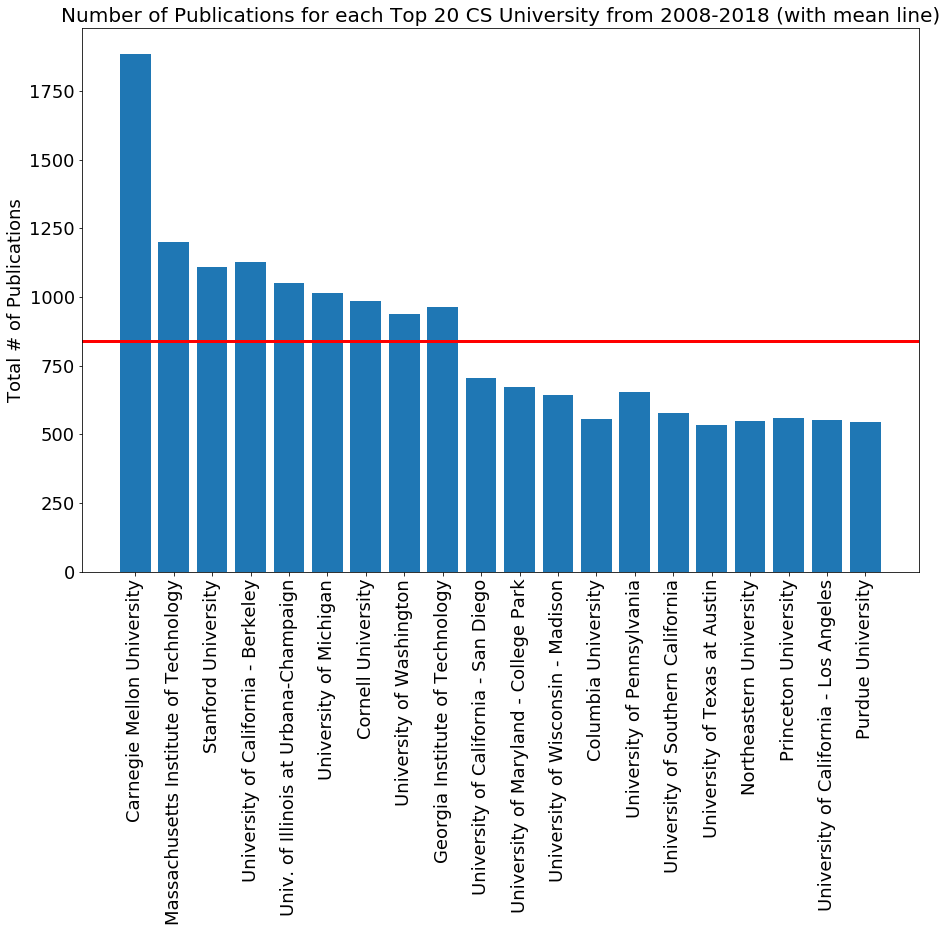

In [242]:
#plots to make: bar plot of all publications for each school
plt.figure(num=None, figsize=(15, 10));
plt.bar(list(range(1,21)), top_20_publication_data['Total Pubs'], width=0.8, align='center')
plt.xticks(list(range(1,21)), top_20, rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Total # of Publications', fontsize=18)
plt.title('Number of Publications for each Top 20 CS University from 2008-2018 (with mean line)',fontsize=20)

#add a mean line
plt.axhline(top_20_publication_data['Total Pubs'].mean(), linewidth=3, color='r')

plt.show()

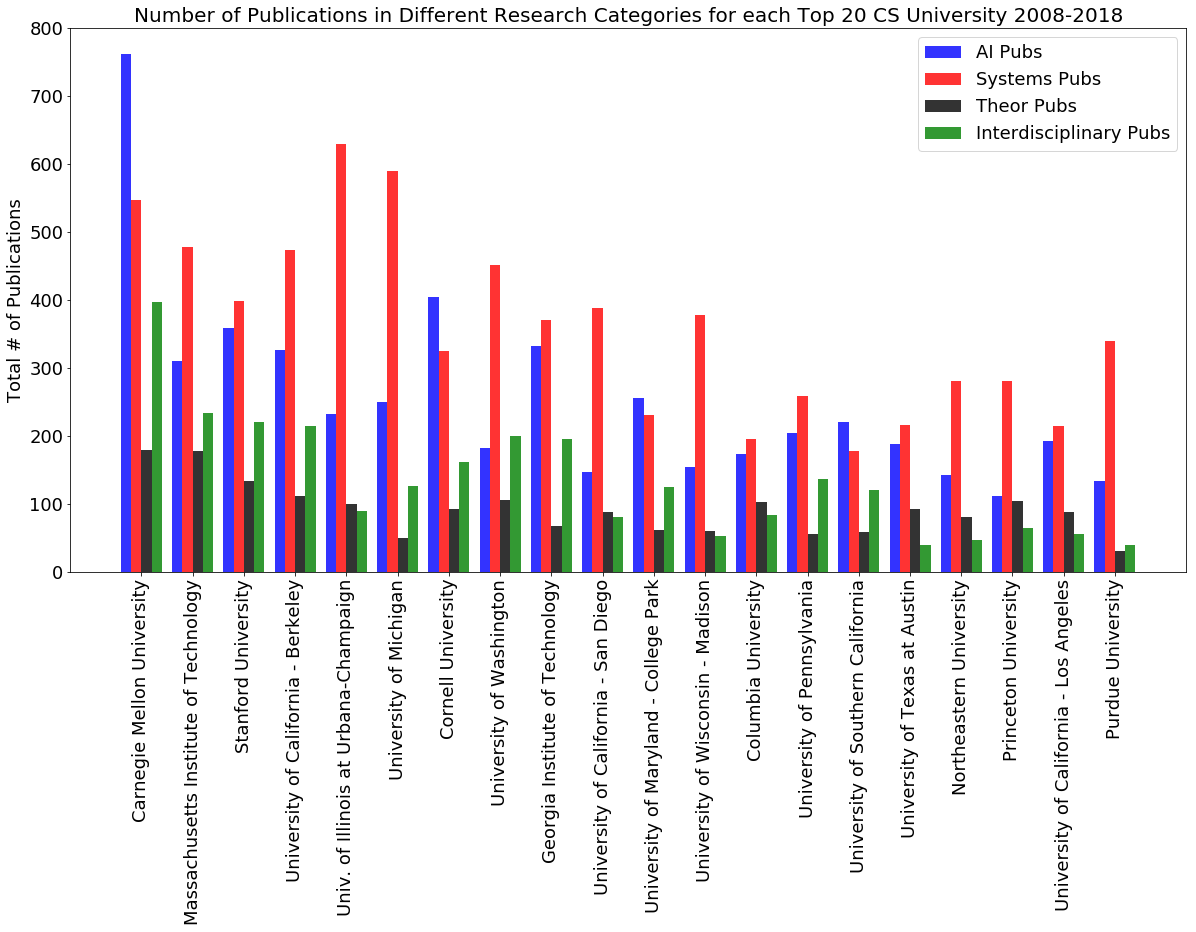

In [243]:
#plot of types of publications by school
fig, ax = plt.subplots(figsize=(20, 10))
index = np.arange(20)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index - (2*bar_width), top_20_publication_data['# AI Pubs'], bar_width, alpha=opacity,\
                 color='b', label='AI Pubs')
rects2 = plt.bar(index - bar_width, top_20_publication_data['# Systems Pubs'], bar_width, alpha=opacity,\
                 color='r', label='Systems Pubs')
rects3 = plt.bar(index, top_20_publication_data['# Theory Pubs'], bar_width, alpha=opacity,\
                 color='k', label='Theor Pubs')
rects4 = plt.bar(index + bar_width, top_20_publication_data['# Inter Pubs'], bar_width, alpha=opacity,\
                 color='g', label='Interdisciplinary Pubs')
plt.xticks(index-(0.5*bar_width), top_20, rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Total # of Publications', fontsize=18)
plt.title('Number of Publications in Different Research Categories for each Top 20 CS University 2008-2018', fontsize=20)
plt.legend(fontsize=18)

plt.show()

The chart above shows the number of publications by each university in four research areas (AI, systems, theory, and interdisciplanary). We observe that systems and AI research are most common across almost all top 20 schools. Also, while certain school have a high number of publications in each category (Carnegie Mellon University) others have a clear focus on one type of research (University of Michigan and systems research). Later, we'll look at how these two cases affect ranking. Is it better to have diverse research, or follow in University of Michigan's footsteps to focus heavily in one research area? <br><br>We have two charts which will help us do hypothesis testing, however there are more ways to explore and understand the dataset. The next charts we made are pie charts showing each school's percentage of research in each area.

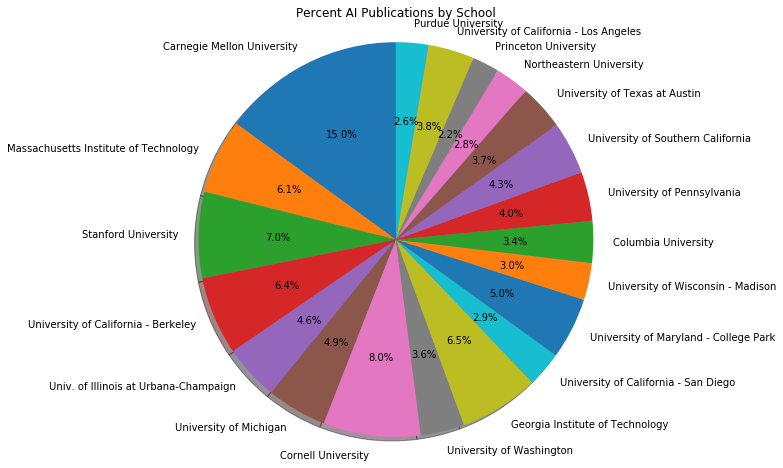

In [252]:
#making pie chart for AI

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(top_20_publication_data['% AI Pubs'], labels=top_20, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent AI Publications by School')

plt.show()

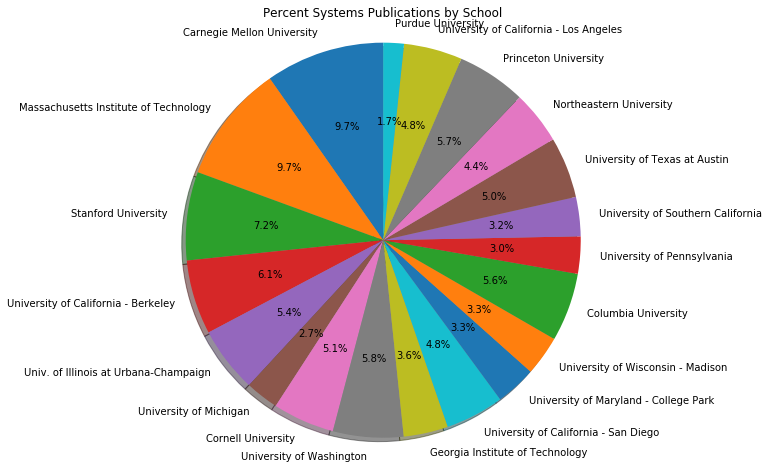

In [253]:
#making pie chart for systems

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(top_20_publication_data['% Systems Pubs'], labels=top_20, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent Systems Publications by School')

plt.show()

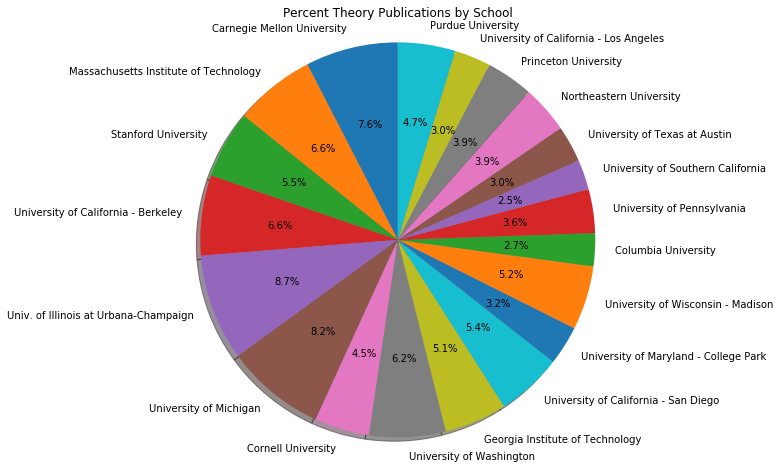

In [254]:
#making pie chart for theory

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(top_20_publication_data['% Theory Pubs'], labels=top_20, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent Theory Publications by School')

plt.show()

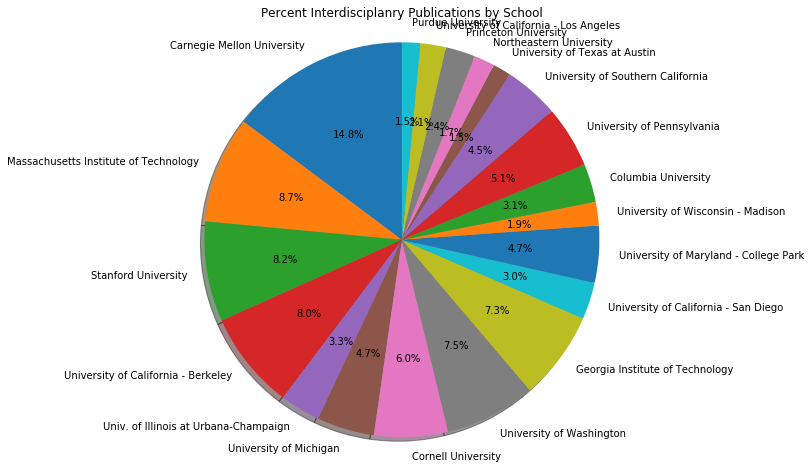

In [255]:
#making pie chart for interdisciplanry research

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(top_20_publication_data['% Inter Pubs'], labels=top_20, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent Interdisciplanry Publications by School')

plt.show()

These pie charts give us a good sense of which schools are contributing the most research in the four areas. The next step is to plot diversity of research and see how much diversity factors into ranking. To do this, we create another column in the dataframe: Diversity. We are scoring diversity based on the difference between highest area publications and the three lower. Then we add those differences together and do 1/diff to get a diversity score.

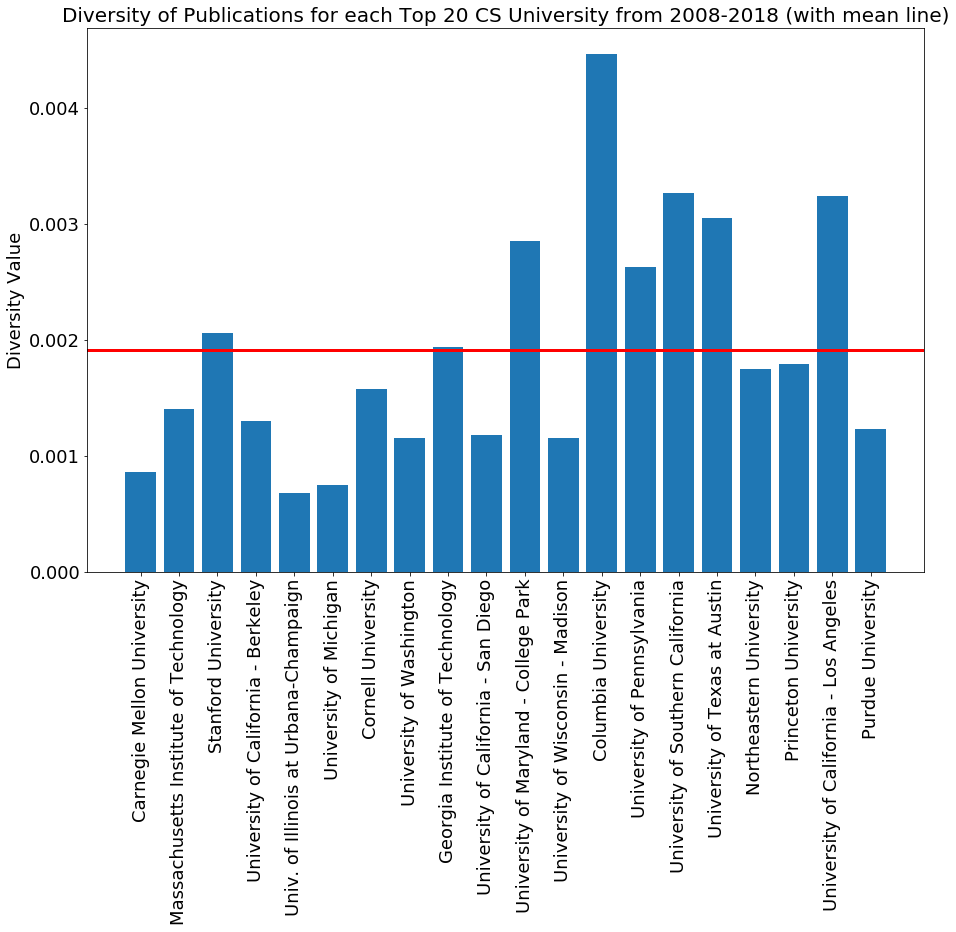

In [269]:
#create a diversity column:
diversity = np.zeros(20)
largest = 0
values = list()

for i in range(0,len(top_20_publication_data)) :
    values.append(top_20_publication_data.at[i,'# AI Pubs'])
    values.append(top_20_publication_data.at[i,'# Systems Pubs'])
    values.append(top_20_publication_data.at[i,'# Theory Pubs'])
    values.append(top_20_publication_data.at[i,'# Inter Pubs'])
    #print(values)
    largest = max(values)
    difference = 0
    for j in range(0,4):
        if values[j] != largest :
            difference = difference + (largest - values[j])
    diversity[i] = 1/difference
    values = []
top_20_publication_data['Diversity'] = diversity

#now create a bar chart for diversity
plt.figure(num=None, figsize=(15, 10));
plt.bar(list(range(1,21)), top_20_publication_data['Diversity'], width=0.8, align='center')
plt.xticks(list(range(1,21)), top_20, rotation='vertical', fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Diversity Value', fontsize=18)
plt.title('Diversity of Publications for each Top 20 CS University from 2008-2018 (with mean line)',fontsize=20)

#add a mean line
plt.axhline(top_20_publication_data['Diversity'].mean(), linewidth=3, color='r')

plt.show()

Interestingly, there seems to be an opposite trend found in the actual ranking system. Here we can see that the higher ranked universities have lower diversity scores than lesser ranked schools such as Columbia University with the highest diversity score.<br><br>
## Hypothesis Testing
#### General Hypothesis Testing Info
The main goal of hypothesis testing is to determine if there is meaning to be extracted from a certain dataset. The process involves establishing a null hypothesis (usually that there is no correlation between the data), testing that hypothesis using a variety of hypothesis testing methods, and deciding whether or no to accept or reject.<br>For info on different types of Python hypothesis tests visit: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
#### Our Hypothesis Testing
Our null hypothesis is that there is no correlation between the number of publications in each of the fields of computer science namely Ai, Systems, theory and other interdisciplinary areas and the ranking of a university. We choose the default 0.05 significance level to verify whether or not we accept our null hypothesis.<br> First, lets take a look at the following regplot.

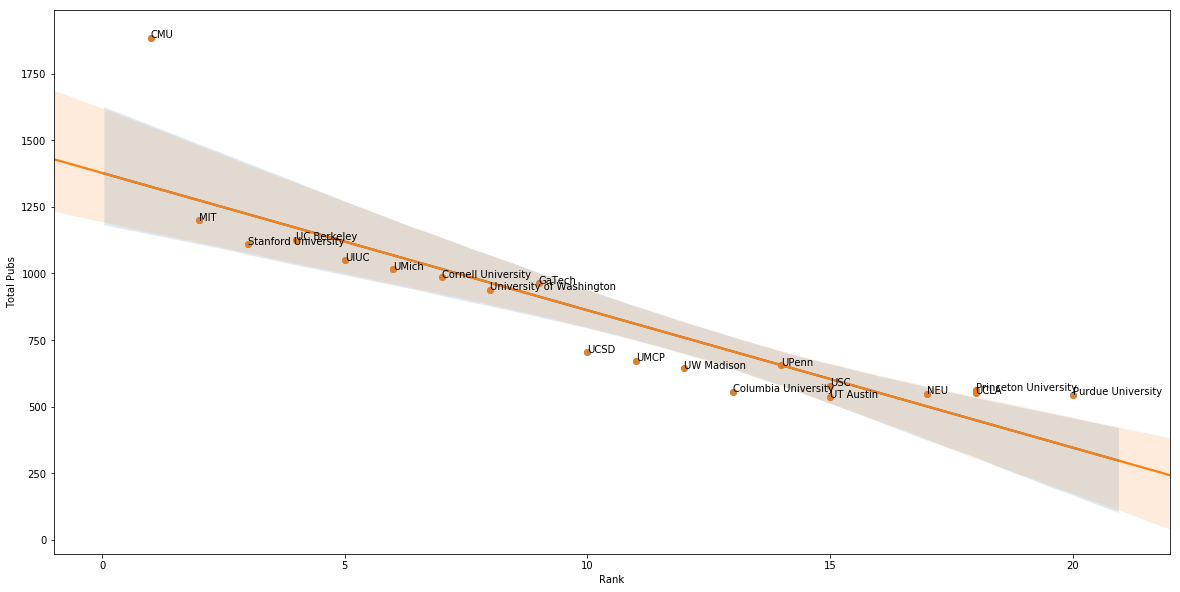

In [245]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10)) 
fig = sns.regplot(top_20_publication_data['Rank'], top_20_publication_data['Total Pubs'], dropna=True)
matplotlib.rcParams['figure.figsize'] = [20,20]
#sns.regplot(x="University", y = "Total Pubs",data = top_20_publication_data)
#top_20_publication_data
sns.regplot(top_20_publication_data['Rank'],top_20_publication_data['Total Pubs'])
for rank,pubs in enumerate(top_20_publication_data['University']):
    if "Carnegie Mellon" in pubs:
        point = "CMU"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Massachusetts" in pubs:
        point = "MIT"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Berkeley" in pubs:
        point = "UC Berkeley"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Urbana-Champaign" in pubs:
        point = "UIUC"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Michigan" in pubs:
        point = "UMich"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Georgia Institute" in pubs:
        point = "GaTech"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "San Diego" in pubs:
        point = "UCSD"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "College Park" in pubs:
        point = "UMCP"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Wisconsin" in pubs:
        point = "UW Madison"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Pennsylvania" in pubs:
        point = "UPenn"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Southern California" in pubs:
        point = "USC"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Austin" in pubs:
        point = "UT Austin"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Northeastern" in pubs:
        point = "NEU"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    elif "Los Angeles" in pubs:
        point = "UCLA"
        ax.annotate(point,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))
    else:
        ax.annotate(pubs,(top_20_publication_data['Rank'][rank], top_20_publication_data['Total Pubs'][rank]))

As we just predicted there is a correlation between the ranking of a university and the total number of publications that 
came out from that university in the last 10yrs.<br><br>If we carefully look at the plot we just did we can see that as the numerical value of the rank increases as the number of publications decrease. To put it in another way as the ranking of the university gets better the number of publications increase correspondingly. We could also take a look at each individual stream that these research papers were published. Let's do that below. Let's try to find the correlation between the ranking of a university with respect to the each field of computer science that we have identified above.
### Now lets analyze the the validity of our null hypothesis 
#### Finding correlation between research publications in the field of AI and the university's ranking

In [246]:
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
a = top_20_publication_data['Total Pubs']
b = top_20_publication_data['Rank']
stats.pearsonr(a, b)

(-0.88025252443513291, 3.089540421732631e-07)

Again the value of importance for us is the p-value. So in this case for the correlation between number of publications 
in AI and the ranking of the university we see that the p-value is 0.000569641420173329 which is reasonably low (p < 0.05) to say that 
these two quantities are in a way correlated and that the r-value this extreme isn't by chance but because the data is correlated.
But lets also look at how other fields research publications affect the university's ranking.
#### Finding correlation between research publications in the field of Systems and the university's ranking

In [270]:
a = top_20_publication_data['# Systems Pubs']
b = top_20_publication_data['Rank']
stats.pearsonr(a, b)

(-0.75364049128012645, 0.00012456702069386116)

Now looking at the p-value for this correlation 0.00012456702069386116 is less than that of what we found for the previous 
case with the number of publications in AI, which implies that there is a better correlation between the number of publications
in the field of systems and the ranking of that particular university.
#### Finding correlation between research publications in the field of Theory and the university's ranking

In [271]:
a = top_20_publication_data['# Theory Pubs']
b = top_20_publication_data['Rank']
stats.pearsonr(a, b)

(-0.64815458485426347, 0.0019972494542912201)

So for this particular correlation the p-value is 0.00199724945429122 which is a little greater than that of AI and Systems.
So compared to the previous two relations and we could say out of all as we see later the correlation between the number of
publications in the field of theory and the ranking of that university is the least. 
#### Finding correlation between research publications in the field of Theory and the university's ranking

In [272]:
a = top_20_publication_data['# Inter Pubs']
b = top_20_publication_data['Rank']
stats.pearsonr(a, b)

(-0.7958889089276393, 2.7095626829420723e-05)

If we take a look at the last subcategory that the research publications in computer science can be categorised 
into is the field of interdisciplinary which is like the research that spans over more than one field. For example using machine
learning in the field of signals processing spans over the fields of  computer science and electrical engineering.
#### Lets take a look at how ranking correlates with the overall publication count

In [273]:
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
a = top_20_publication_data['Total Pubs']
b = top_20_publication_data['Rank']
stats.pearsonr(a, b)

(-0.88025252443513291, 3.089540421732631e-07)

In general for  Pearson's correlation technique we get two values that are of importance for us. These are the p-value (first value) and the r-value (second value).<br>
p-value for a correlation indicates the probability of more extreme, for example if it is unlikely  a correlation this large by chance if the sample of n subjects were taken from a population whose
correlation was zero (that is if the correlation is large).  So, small p values give us more confidence in our correlation.<br>The p-value in our case is 3.089540421732631e-07 implies us that there is a very less probability that we would see such extreme r-values if there was no correlation between the data. And so we can say that there is indeed a correlation between the number
 of publications from the university and its ranking.

## 5. Conclusion
As many people in the industry and academia must be aware that the rankings published USNews are not authentic in a complete sense. Let me tell you why. If you see their ranking methodology you can see that they send out surveys to the deans and and the department heads of the universities. And based on the results they get from these people they calculate the rankings. One can see an obvious flaw in this that it can be highly biased because these people filling out the survey can be biased towards that particular university and that's the reason we choose to analyze the data from the csrankings.org website which calculates the university rankings based off of the research that these universities perform in the field of computer science. So we decided to analyze how does the research reputation or the number of research papers published affect a university's ranking. 
   So we started our analysis by acquiring the data from the csrankings.org website and perform preliminary steps like cleansing the data, and then plotting some basic plots to see how the data is distributed. After looking at each of the pearson correlation coefficients for the five pearson tests that we conducted we can see that the p-value is less than the significance level we choose (0.05) and so thus we can now strongly reject our null hypotheses and conclude that the number of publications 
   either the overall count or in each field does indeed correlate with the ranking of the university.
<br><br>So...<br>Now you're well versed in both how research influences university rankings and the data science pipeline. With this tutorial you could perform your own analyses on how publication affects other ranking systems (U.S. News and World Report?) or any data driven question. Curious about how poverty in America vs the rest of the world? The effect of temperature on NFL football games? Use these tools to master data and extract meaning from the world around you!<br><br>For a more comprehensive look at data science and machine learning, there are many online classes. Here are a couple highly regarded classses:<br>https://www.class-central.com/course/udacity-intro-to-data-analysis-4937<br>https://www.udemy.com/machinelearning/<br>https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/